[Regression] activation=identity  MSE=   418.616  R2= 0.975


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[Regression] activation=tanh      MSE=  3610.097  R2= 0.786


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[Regression] activation=relu      MSE=   478.701  R2= 0.972
[Regression] activation=logistic  MSE=   440.948  R2= 0.974


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


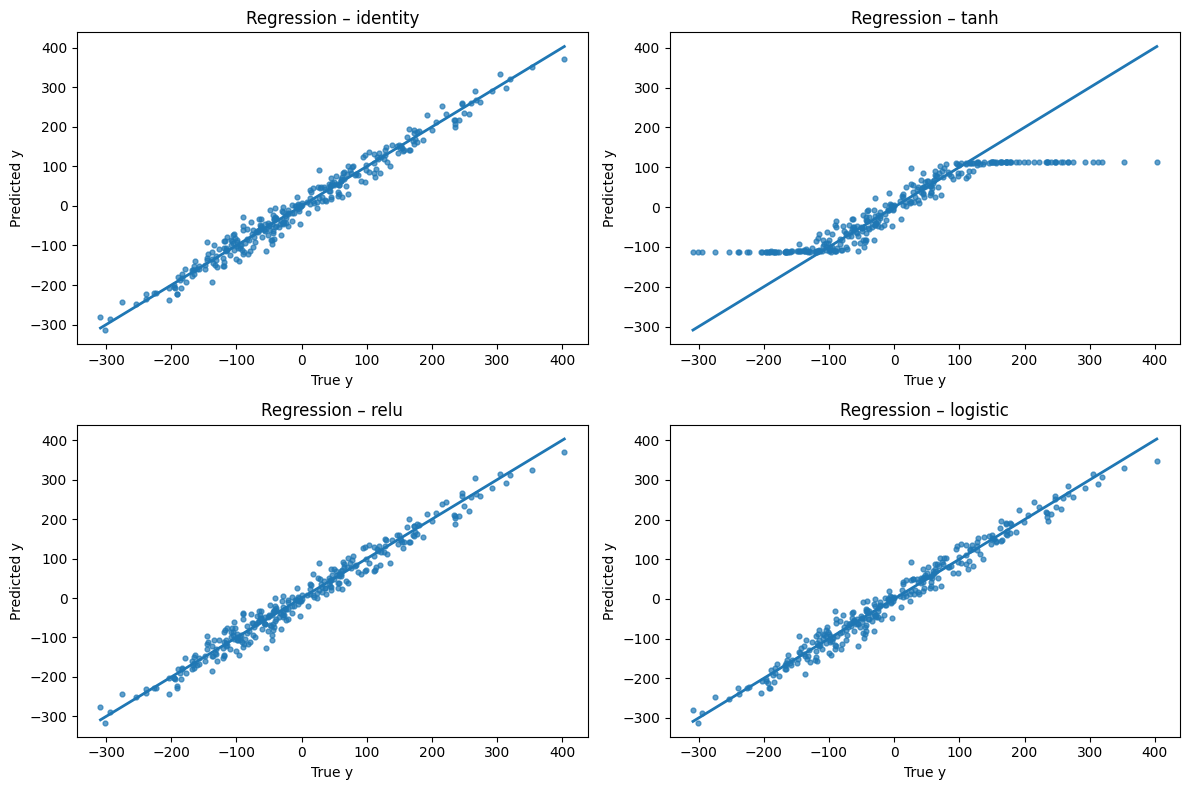

In [1]:
# ---------- REGRESSION: MLPRegressor activations comparison ----------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Reproducible dataset
X, y = make_regression(
    n_samples=1200, n_features=8, n_informative=6,
    noise=20.0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Always scale inputs for MLPs
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s  = x_scaler.transform(X_test)

activations = ["identity", "tanh", "relu", "logistic"]
results = []

for act in activations:
    # Special handling: 'logistic' outputs in (0,1), so scale y to (0,1) and invert after prediction
    if act == "logistic":
        y_scaler = MinMaxScaler().fit(y_train.reshape(-1, 1))
        y_tr = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
        reg = MLPRegressor(
            hidden_layer_sizes=(128, 64),
            activation=act,
            solver="adam",
            learning_rate_init=1e-3,
            max_iter=400,
            random_state=42
        )
        reg.fit(X_train_s, y_tr)
        y_pred = reg.predict(X_test_s)
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    else:
        reg = MLPRegressor(
            hidden_layer_sizes=(128, 64),
            activation=act,
            solver="adam",
            learning_rate_init=1e-3,
            max_iter=400,
            random_state=42
        )
        reg.fit(X_train_s, y_train)
        y_pred = reg.predict(X_test_s)

    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    results.append((act, mse, r2))
    print(f"[Regression] activation={act:8s}  MSE={mse:10.3f}  R2={r2:6.3f}")

# Quick visualization: true vs. predicted for each activation
cols = 2
rows = int(np.ceil(len(activations)/cols))
plt.figure(figsize=(12, 4*rows))
for i, (act, _, _) in enumerate(results, 1):
    # Recompute predictions for plotting (simple reuse)
    if act == "logistic":
        y_scaler = MinMaxScaler().fit(y_train.reshape(-1, 1))
        y_tr = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
        reg = MLPRegressor(hidden_layer_sizes=(128,64), activation=act, solver="adam",
                           learning_rate_init=1e-3, max_iter=400, random_state=42)
        reg.fit(X_train_s, y_tr)
        y_pred = y_scaler.inverse_transform(reg.predict(X_test_s).reshape(-1,1)).ravel()
    else:
        reg = MLPRegressor(hidden_layer_sizes=(128,64), activation=act, solver="adam",
                           learning_rate_init=1e-3, max_iter=400, random_state=42)
        reg.fit(X_train_s, y_train)
        y_pred = reg.predict(X_test_s)

    ax = plt.subplot(rows, cols, i)
    ax.scatter(y_test, y_pred, s=12, alpha=0.7)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)
    ax.set_title(f"Regression – {act}")
    ax.set_xlabel("True y")
    ax.set_ylabel("Predicted y")
plt.tight_layout()
plt.show()
